# Préprocessing du dataset

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("../../data/train_dataset.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


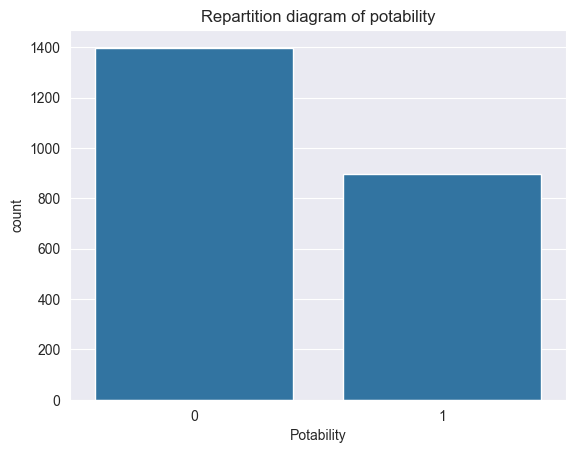

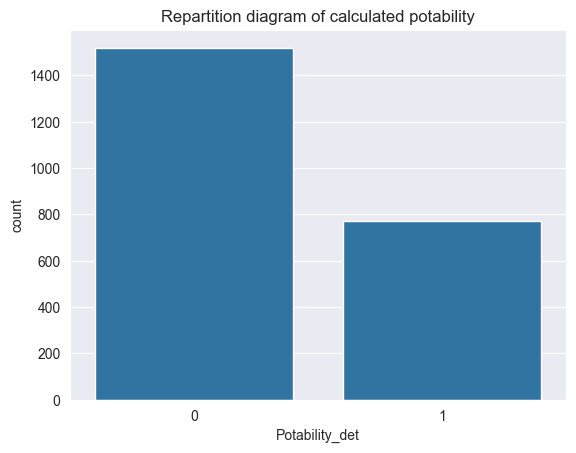

In [9]:
rules = {   # Définies grâce aux données de l'OMS et de la réglementation Européenne et Canadienne
    'ph': (6.5, 9.5),
    'Hardness': (150, 500),
    'Solids': (0, float('inf')),
    'Chloramines': (0, 8),
    'Sulfate': (0, 500),
    'Conductivity': (0, 1200),
    'Organic_carbon': (0, float('inf')),  # Aucune règle spécifique pour le carbone organique
    'Trihalomethanes': (0, 80),
    'Turbidity': (0, 5)
}

# Fonction pour déterminer la potabilité en fonction des règles
def determine_potability(row):
    for param, (min_val, max_val) in rules.items():
        if not (min_val <= row[param] <= max_val):
            return 0  # Ne respecte pas une règle => non potable
    return 1  # Toutes les règles sont respectées => potable

df['Potability_det'] = df.apply(determine_potability, axis=1)

df.to_csv("../../data/data_preprocessed.csv")

sns.countplot(data=df, x="Potability")
plt.title("Repartition diagram of potability")
plt.show()

sns.countplot(data=df, x="Potability_det")
plt.title("Repartition diagram of calculated potability")
plt.show()